1. Past data can be used to predict future
2. a good machine model doesn't capture noise
3. more noise in model is over fitting
4. past data alone could be under fitting

5. Data converted to math model is data science
6. cleaning the data
7. finding the patterns in data
8. summarize the patterns in mathematical way

9. Training set and testing set
10. usually 70% to training and 30% testing set

11. Two types: Supervised and Unsupervised learining
12. supervised: bunch of inputs for one output (ground truth is always available) - Regression - which is continous number, Classified
13. unsupervised: group data to get grouped output - not desired output and has no labels - Clustering: grouping data, Dimentional reduction: compressing data, Associationg rule learning: If X then Y
14. Both supervised and unsupervised have absolutely different models
15. semi supervised - only few data is labelled not all but have desired or requires desired output.

In [12]:
# Regression
# Linear regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [13]:
data = pd.read_csv("/Users/ravs/Desktop/UTA-AIML/intro-machine-learning/datasets/Sales.csv")

In [14]:
data

,Advertising Expenditure,Campaign Engagement Score,Discount Percentage,Average Customer Rating,Product Price,Return Rate,Length of Product Description,Region,Popularity,Sales
0,644.049317,54.565531,25.267151,4.604634,1599.575723,2.133580,231.185389,East,High,26246.91291
1,521.483294,46.875226,35.075859,4.358693,1586.464404,1.553437,262.686931,West,Very High,21432.16935
2,540.079510,42.287145,12.618381,4.571018,1301.644856,2.274891,324.347319,South,Very High,22551.92436
3,627.938419,61.825441,31.588445,4.234209,1601.041884,1.035971,447.710984,South,Very High,27792.29446
4,471.149948,31.061512,9.198991,4.816215,1496.734345,3.276840,310.055333,East,Moderate,17354.77148
...,...,...,...,...,...,...,...,...,...,...
2995,557.098500,39.733056,25.511859,4.705654,1491.415606,1.314891,143.790388,North,Moderate,21332.40603
2996,667.120978,54.746729,30.626235,4.374541,1259.077673,0.429627,378.527732,West,High,26780.91894
2997,653.702072,43.975689,28.177723,4.240031,1689.196119,0.956180,251.927969,South,Moderate,21217.38795
2998,539.521178,30.624460,26.914985,4.423562,1103.443317,2.271826,320.796878,West,High,22094.55742


In [15]:
data.shape

(3000, 10)

In [16]:
data.describe()

,Advertising Expenditure,Campaign Engagement Score,Discount Percentage,Average Customer Rating,Product Price,Return Rate,Length of Product Description,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,607.727150,49.456305,28.997927,4.408783,1434.718134,1.666106,248.696636,23858.638609
std,82.025112,13.171290,4.700923,0.227823,222.832467,0.900435,60.800024,3611.748810
min,97.250000,0.000000,0.000000,3.649450,9.780000,0.033720,42.000000,3257.595426
25%,561.984787,40.697530,26.222998,4.251118,1306.155958,0.954551,207.076217,21632.968838
50%,616.116596,49.478699,29.552853,4.432254,1461.301831,1.537856,249.348398,24087.129995
75%,666.331853,58.150891,32.259294,4.583205,1587.671790,2.285394,288.875650,26421.772433
max,801.500000,98.750000,40.540000,4.874450,2000.560000,4.534866,496.000000,34421.427430


In [17]:
data.head()

,Advertising Expenditure,Campaign Engagement Score,Discount Percentage,Average Customer Rating,Product Price,Return Rate,Length of Product Description,Region,Popularity,Sales
0,644.049317,54.565531,25.267151,4.604634,1599.575723,2.133580,231.185389,East,High,26246.91291
1,521.483294,46.875226,35.075859,4.358693,1586.464404,1.553437,262.686931,West,Very High,21432.16935
2,540.079510,42.287145,12.618381,4.571018,1301.644856,2.274891,324.347319,South,Very High,22551.92436
3,627.938419,61.825441,31.588445,4.234209,1601.041884,1.035971,447.710984,South,Very High,27792.29446
4,471.149948,31.061512,9.198991,4.816215,1496.734345,3.276840,310.055333,East,Moderate,17354.77148


In [18]:
data.tail()

,Advertising Expenditure,Campaign Engagement Score,Discount Percentage,Average Customer Rating,Product Price,Return Rate,Length of Product Description,Region,Popularity,Sales
2995,557.098500,39.733056,25.511859,4.705654,1491.415606,1.314891,143.790388,North,Moderate,21332.40603
2996,667.120978,54.746729,30.626235,4.374541,1259.077673,0.429627,378.527732,West,High,26780.91894
2997,653.702072,43.975689,28.177723,4.240031,1689.196119,0.956180,251.927969,South,Moderate,21217.38795
2998,539.521178,30.624460,26.914985,4.423562,1103.443317,2.271826,320.796878,West,High,22094.55742
2999,644.650377,63.915941,31.834084,4.427621,1714.536258,0.750080,281.425582,South,Very High,21770.06668


In [19]:
data["Advertising Expenditure"].mean()

607.7271500573667

In [20]:
sales = data.copy()

In [21]:
sales

,Advertising Expenditure,Campaign Engagement Score,Discount Percentage,Average Customer Rating,Product Price,Return Rate,Length of Product Description,Region,Popularity,Sales
0,644.049317,54.565531,25.267151,4.604634,1599.575723,2.133580,231.185389,East,High,26246.91291
1,521.483294,46.875226,35.075859,4.358693,1586.464404,1.553437,262.686931,West,Very High,21432.16935
2,540.079510,42.287145,12.618381,4.571018,1301.644856,2.274891,324.347319,South,Very High,22551.92436
3,627.938419,61.825441,31.588445,4.234209,1601.041884,1.035971,447.710984,South,Very High,27792.29446
4,471.149948,31.061512,9.198991,4.816215,1496.734345,3.276840,310.055333,East,Moderate,17354.77148
...,...,...,...,...,...,...,...,...,...,...
2995,557.098500,39.733056,25.511859,4.705654,1491.415606,1.314891,143.790388,North,Moderate,21332.40603
2996,667.120978,54.746729,30.626235,4.374541,1259.077673,0.429627,378.527732,West,High,26780.91894
2997,653.702072,43.975689,28.177723,4.240031,1689.196119,0.956180,251.927969,South,Moderate,21217.38795
2998,539.521178,30.624460,26.914985,4.423562,1103.443317,2.271826,320.796878,West,High,22094.55742


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Advertising Expenditure        3000 non-null   float64
 1   Campaign Engagement Score      3000 non-null   float64
 2   Discount Percentage            3000 non-null   float64
 3   Average Customer Rating        3000 non-null   float64
 4   Product Price                  3000 non-null   float64
 5   Return Rate                    3000 non-null   float64
 6   Length of Product Description  3000 non-null   float64
 7   Region                         3000 non-null   object 
 8   Popularity                     3000 non-null   object 
 9   Sales                          3000 non-null   float64
dtypes: float64(8), object(2)
memory usage: 234.5+ KB


In [23]:
data.duplicated().sum()

0

In [24]:
plt.figure(figsize=(10,5))
features = data.select_dtypes(exclude=['number']).columns.tolist()
features

['Region', 'Popularity']

<Figure size 1000x500 with 0 Axes>

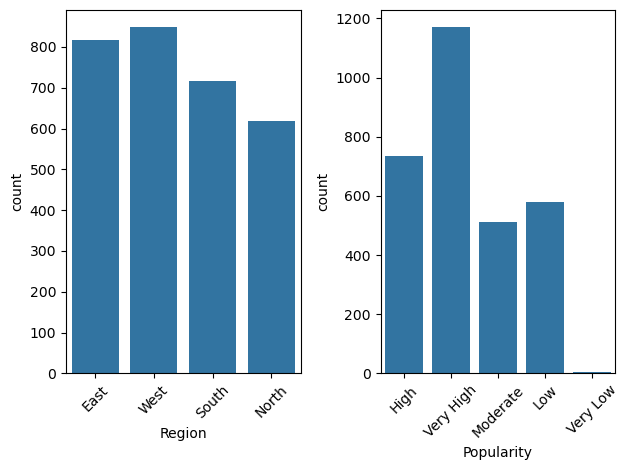

In [25]:
for i,feature in enumerate(features):
    plt.subplot(1,2, i+1)
    plt.xticks(rotation=45)
    sns.countplot(data=data, x=feature)

plt.tight_layout()
plt.show()

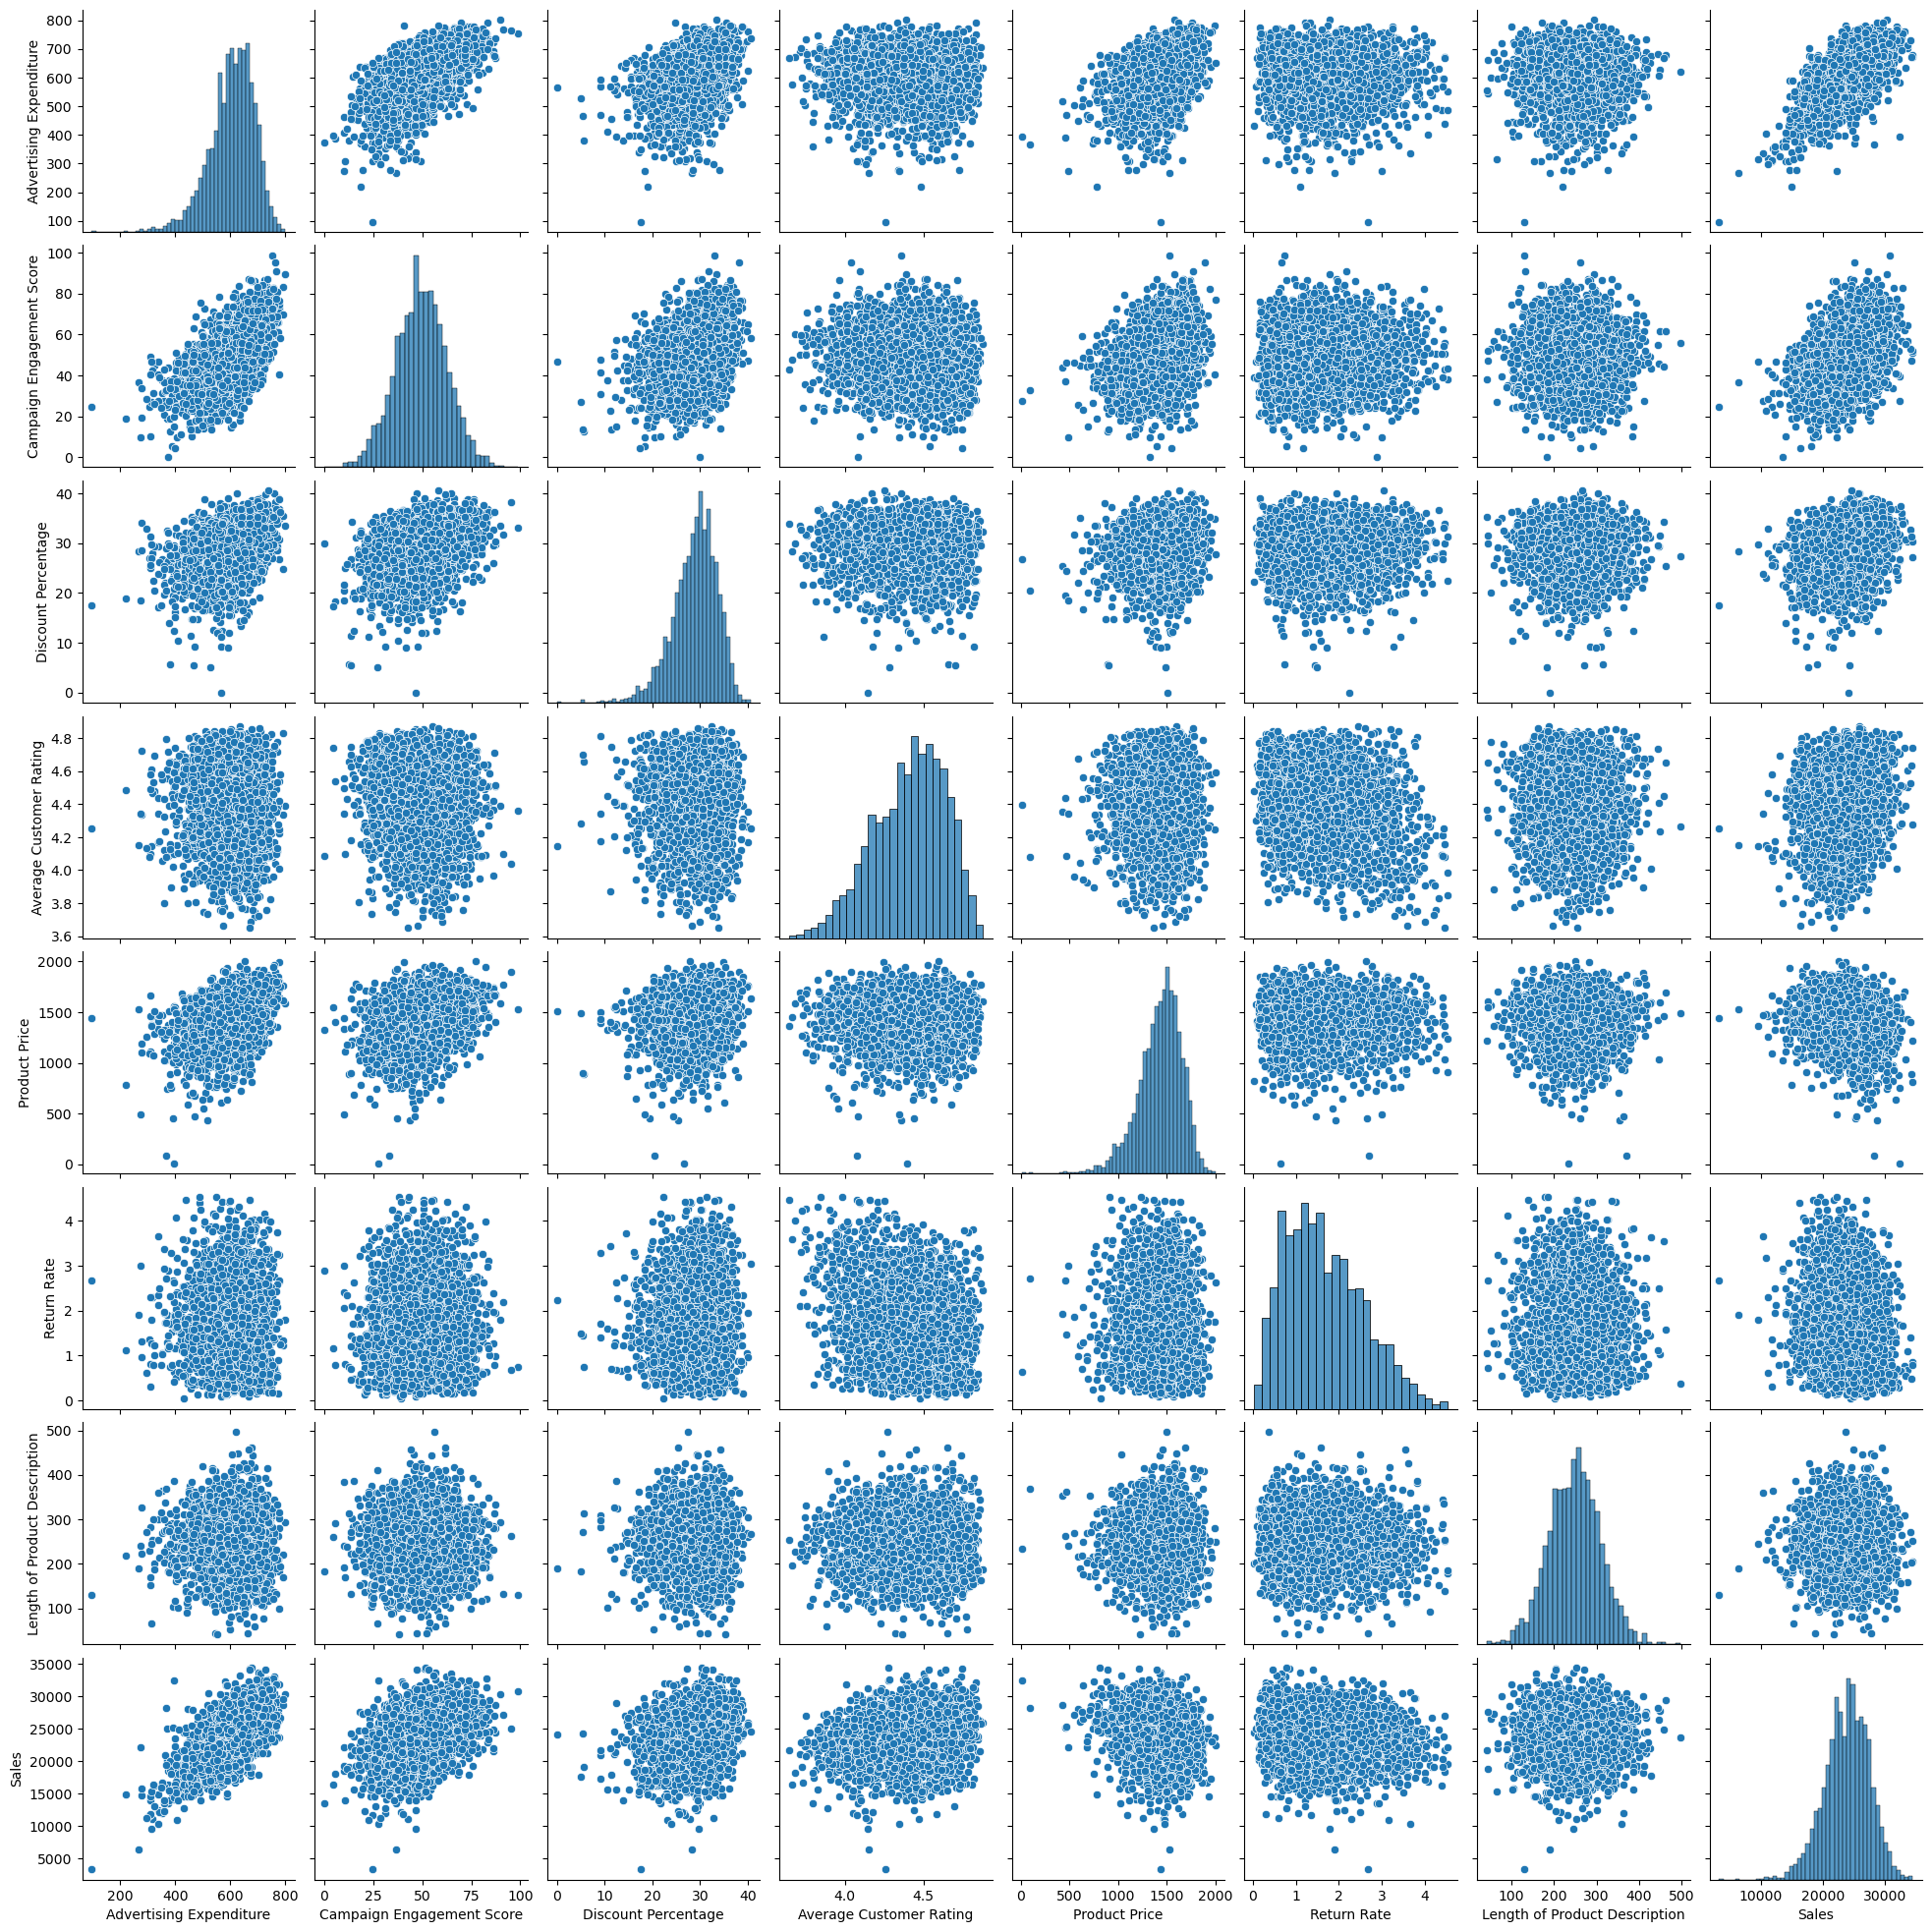

In [26]:
sns.pairplot(data)

<Axes: >

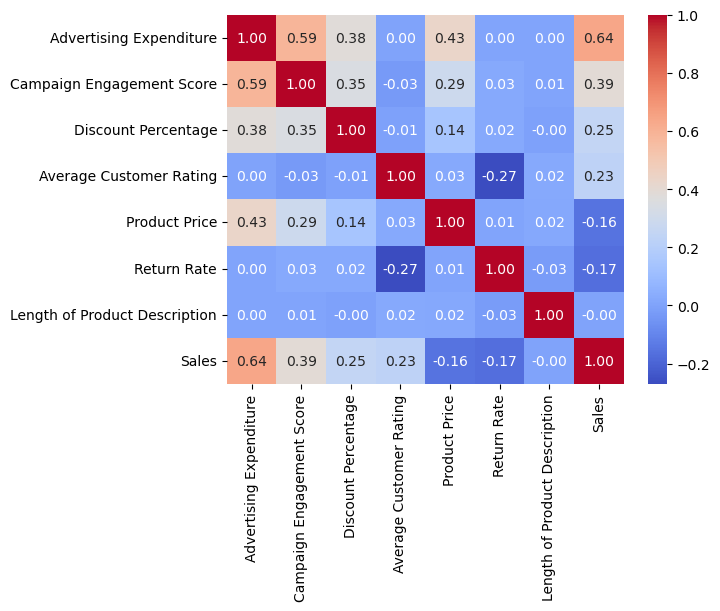

In [27]:
sns.heatmap(data.corr(numeric_only=True),annot=True,fmt='0.2f',cmap='coolwarm')

In [28]:
data.corr(numeric_only=True)

,Advertising Expenditure,Campaign Engagement Score,Discount Percentage,Average Customer Rating,Product Price,Return Rate,Length of Product Description,Sales
Advertising Expenditure,1.000000,0.587461,0.384448,0.001275,0.430439,0.002550,0.002630,0.640161
Campaign Engagement Score,0.587461,1.000000,0.345843,-0.027843,0.288833,0.026250,0.006678,0.392700
Discount Percentage,0.384448,0.345843,1.000000,-0.007266,0.143750,0.022882,-0.002926,0.249790
Average Customer Rating,0.001275,-0.027843,-0.007266,1.000000,0.026937,-0.270715,0.023000,0.226636
Product Price,0.430439,0.288833,0.143750,0.026937,1.000000,0.005978,0.020232,-0.155808
Return Rate,0.002550,0.026250,0.022882,-0.270715,0.005978,1.000000,-0.025723,-0.171292
Length of Product Description,0.002630,0.006678,-0.002926,0.023000,0.020232,-0.025723,1.000000,-0.001423
Sales,0.640161,0.392700,0.249790,0.226636,-0.155808,-0.171292,-0.001423,1.000000


<Axes: xlabel='Popularity', ylabel='Sales'>

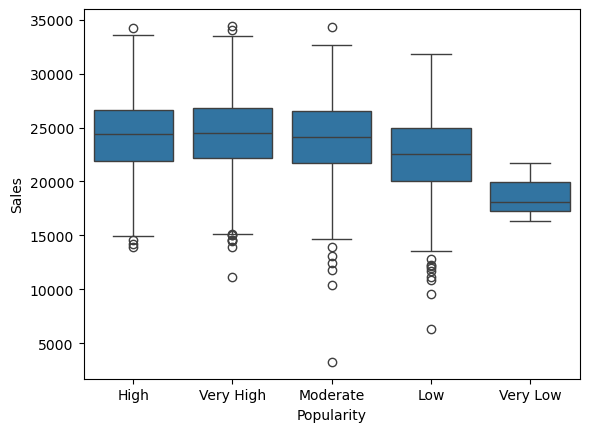

In [29]:
sns.boxplot(data=data, y='Sales', x='Popularity')

In [30]:
X = data.drop('Sales', axis=1)
y = data['Sales']
X

,Advertising Expenditure,Campaign Engagement Score,Discount Percentage,Average Customer Rating,Product Price,Return Rate,Length of Product Description,Region,Popularity
0,644.049317,54.565531,25.267151,4.604634,1599.575723,2.133580,231.185389,East,High
1,521.483294,46.875226,35.075859,4.358693,1586.464404,1.553437,262.686931,West,Very High
2,540.079510,42.287145,12.618381,4.571018,1301.644856,2.274891,324.347319,South,Very High
3,627.938419,61.825441,31.588445,4.234209,1601.041884,1.035971,447.710984,South,Very High
4,471.149948,31.061512,9.198991,4.816215,1496.734345,3.276840,310.055333,East,Moderate
...,...,...,...,...,...,...,...,...,...
2995,557.098500,39.733056,25.511859,4.705654,1491.415606,1.314891,143.790388,North,Moderate
2996,667.120978,54.746729,30.626235,4.374541,1259.077673,0.429627,378.527732,West,High
2997,653.702072,43.975689,28.177723,4.240031,1689.196119,0.956180,251.927969,South,Moderate
2998,539.521178,30.624460,26.914985,4.423562,1103.443317,2.271826,320.796878,West,High


In [31]:
y

0       26246.91291
1       21432.16935
2       22551.92436
3       27792.29446
4       17354.77148
           ...     
2995    21332.40603
2996    26780.91894
2997    21217.38795
2998    22094.55742
2999    21770.06668
Name: Sales, Length: 3000, dtype: float64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=42
)

Sales = (28.667487552010183) * Advertising Expenditure + 6435.891302271066


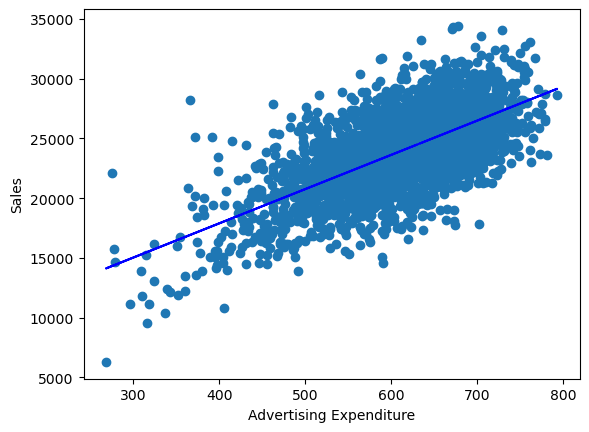

In [33]:
ind_vars1 = ['Advertising Expenditure']
lin_reg1 = LinearRegression()
lin_reg1.fit(X_train[ind_vars1], y_train)
print(f"Sales = ({lin_reg1.coef_[0]}) * {ind_vars1[0]} + {lin_reg1.intercept_}")
fitted_values1 = lin_reg1.predict(X_train[ind_vars1])

#plot
plt.scatter(X_train[ind_vars1], y_train)
plt.plot(X_train[ind_vars1],fitted_values1, color='blue')
plt.xlabel(ind_vars1[0])
plt.ylabel('Sales')
plt.show()

Sales = (188.38555540329244) * Discount Percentage + 18411.681879531294


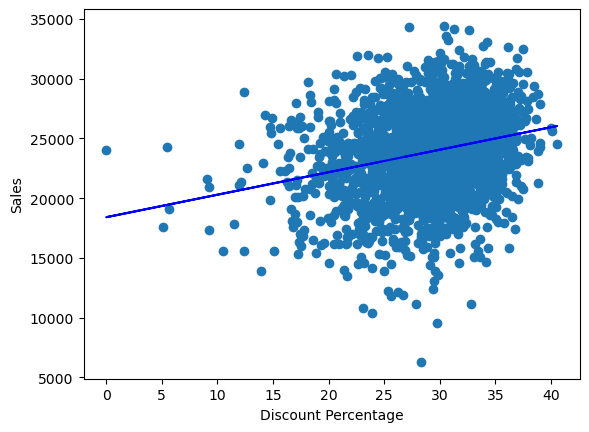

In [34]:
ind_vars2 = ['Discount Percentage']
lin_reg2 = LinearRegression()
lin_reg2.fit(X_train[ind_vars2], y_train)
print(f"Sales = ({lin_reg2.coef_[0]}) * {ind_vars2[0]} + {lin_reg2.intercept_}")
fitted_values2 = lin_reg2.predict(X_train[ind_vars2])

#plot
plt.scatter(X_train[ind_vars2], y_train)
plt.plot(X_train[ind_vars2],fitted_values2, color='blue')
plt.xlabel(ind_vars2[0])
plt.ylabel('Sales')
plt.show()

Sales = (-2.539232052840607) * Product Price + 27522.91607345546


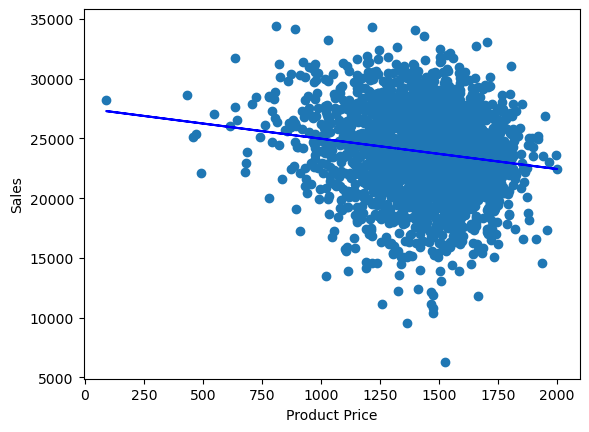

In [35]:
ind_vars3 = ['Product Price']
lin_reg3 = LinearRegression()
lin_reg3.fit(X_train[ind_vars3], y_train)
print(f"Sales = ({lin_reg3.coef_[0]}) * {ind_vars3[0]} + {lin_reg3.intercept_}")
fitted_values3 = lin_reg3.predict(X_train[ind_vars3])

#plot
plt.scatter(X_train[ind_vars3], y_train)
plt.plot(X_train[ind_vars3],fitted_values3, color='blue')
plt.xlabel(ind_vars3[0])
plt.ylabel('Sales')
plt.show()

In [36]:
#multi regression model
ind_vars4 = ['Advertising Expenditure', 'Discount Percentage']
lin_reg4 = LinearRegression()
lin_reg4.fit(X_train[ind_vars4], y_train)
print(f"Sales = ({lin_reg4.coef_[0]}) * {ind_vars4[0]} + ({lin_reg4.coef_[1]}) * {ind_vars4[1]}  + {lin_reg4.intercept_}")
fitted_values4 = lin_reg4.predict(X_train[ind_vars4])

#plot
# plt.scatter(X_train[ind_vars3], y_train)
# plt.plot(X_train[ind_vars3],fitted_values3, color='blue')
# plt.xlabel(ind_vars3[0])
# plt.ylabel('Sales')
# plt.show()

Sales = (28.70843207445031) * Advertising Expenditure + (-1.8036346364589846) * Discount Percentage  + 6463.32114671696


In [37]:
lab_enc = {
    'Very Low': 1,
    'Low': 2,
    'Moderate': 3,
    'High': 4,
    'Very High': 5,
}

In [38]:
X['Popularity'] = X['Popularity'].map(
    lambda x: lab_enc[x]
)

In [39]:
#post changing the categorial into numerical value
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=42
)

In [40]:
ind_vars4 = ['Advertising Expenditure', 'Discount Percentage', 'Product Price', 'Popularity']
lin_reg4 = LinearRegression()
lin_reg4.fit(X_train[ind_vars4], y_train)
print(f"Sales = ({lin_reg4.coef_[0]}) * {ind_vars4[0]} + ({lin_reg4.coef_[1]}) * {ind_vars4[1]} + ({lin_reg4.coef_[2]}) * {ind_vars4[2]} + ({lin_reg4.coef_[3]}) * {ind_vars4[3]}  + {lin_reg4.intercept_}")
fitted_values4 = lin_reg4.predict(X_train[ind_vars4])

Sales = (38.29568341553413) * Advertising Expenditure + (-1.5877980394794786) * Discount Percentage + (-8.515977612064011) * Product Price + (542.6978481319412) * Popularity  + 10758.596248519625


In [41]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=['object', 'category']).columns.tolist(),
    drop_first=True,
)

X = X.astype(float)

X.head()

,Advertising Expenditure,Campaign Engagement Score,Discount Percentage,Average Customer Rating,Product Price,Return Rate,Length of Product Description,Popularity,Region_North,Region_South,Region_West
0,644.049317,54.565531,25.267151,4.604634,1599.575723,2.133580,231.185389,4.0,0.0,0.0,0.0
1,521.483294,46.875226,35.075859,4.358693,1586.464404,1.553437,262.686931,5.0,0.0,0.0,1.0
2,540.079510,42.287145,12.618381,4.571018,1301.644856,2.274891,324.347319,5.0,0.0,1.0,0.0
3,627.938419,61.825441,31.588445,4.234209,1601.041884,1.035971,447.710984,5.0,0.0,1.0,0.0
4,471.149948,31.061512,9.198991,4.816215,1496.734345,3.276840,310.055333,3.0,0.0,0.0,0.0


In [42]:
#post changing the categorial into numerical value
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=42
)

lin_reg7 = LinearRegression()

In [43]:
lin_reg7.fit(X_train,y_train)

LinearRegression()

In [44]:
for i in range(0, len(lin_reg7.coef_)):
    print(lin_reg7.feature_names_in_[i], lin_reg7.coef_[i])

Advertising Expenditure 36.80037684442104
Campaign Engagement Score 20.77763369825375
Discount Percentage -6.918466291297884
Average Customer Rating 2890.278101515826
Product Price -8.670033784471675
Return Rate -444.78773418022115
Length of Product Description -0.05088338568199714
Popularity 146.84228310853254
Region_North -6.981144476910693
Region_South 52.881761847957314
Region_West 189.16736137256677


In [45]:
#model performance evaulation
#function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets-predictions)/ targets) * 100

#function to compute adjusted R2
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictions.shape[0]
    k = predictors.shape[1]
    return 1 - ((1-r2) * (n-1) / (n-k-1))

#function to compute different metrics to check performance of regression model
def model_performance_regression(model, predictors, target):
    """
    performance

    """
    pred = model.predict(predictors)
    rmse = np.sqrt(mean_squared_error(target, pred))
    mae = mean_absolute_error(target, pred)
    mape = mape_score(target, pred)
    r2 = r2_score(target, pred)
    adj_r2 = adj_r2_score(predictors, target, pred)

    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "MAPE": mape,
            "R-squared": r2,
            "Adj R-squared": adj_r2,
        },
        index=[0],
    )
    return df_perf

In [46]:
lin_reg1_train_perf = model_performance_regression(lin_reg1, X_train[ind_vars1],y_train)
lin_reg1_train_perf

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,2753.419094,2207.551603,9.647262,0.415783,0.415539


In [47]:
lin_reg2_train_perf = model_performance_regression(lin_reg2, X_train[ind_vars2],y_train)
lin_reg2_train_perf 

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,3489.766337,2761.85512,12.464781,0.061525,0.061134


In [48]:
lin_reg1_test_perf = model_performance_regression(lin_reg4, X_test[ind_vars4],y_test)
lin_reg1_test_perf

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,2047.484172,1639.883732,7.15333,0.684473,0.682352


In [88]:
lin_reg7_train_perf = model_performance_regression(lin_reg7, X_train,y_train)
lin_reg7_train_perf

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,1940.930335,1564.829605,6.785088,0.709698,0.708361


In [90]:
lin_reg7_test_perf = model_performance_regression(lin_reg7, X_test,y_test)
lin_reg7_test_perf

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,1907.839718,1558.392467,6.763019,0.726045,0.72092
